<a href="https://colab.research.google.com/github/AriKlein/intro_rl_project/blob/main/intro_rl_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Reinforcement Learning Final Project
# Ari Klein (aeklein)



# 1)  Describe the methods and variables in the class DiscreteEnv which is the parent class of the Taxi V3 class.

DiscreteEnv has member data:
-	nS and nA capturing the number of states and actions, respectively.  
-	isd, which is a list of length nS giving the probability, for each state, that the initial state gets set to that state for any given call to reset()
-	P, which is a dictionary storing, for each {state, action} pair, the corresponding next state, the corresponding reward, and whether, after taking that action from the initial state, the system is now in a terminal state.  If the transitions are probabilistic, it stores all possible sets of {next_state, reward, done} in a list along with the probability associated with each possible {next_state, reward, done}
-	lastaction, which stores the previous action taken
-	s, which stores the current state
-	action_space and observation_space, which are discrete spaces of size nA and nS, respectively, representing the space of possible actions and states, respectively. 
DiscreteEnv has member functions (e.g. methods):
-	init for constructing a DiscreteEnv object with member data set to the values specified in its arguments
-	seed for setting the seed for the RNG to a specified value or to a random one if no value is specified
-	reset, which resets the system by setting the state to an initial state sampled from the set of possible states according to distribution isd.  Also sets lastaction to None
-	step, which takes an action, moves from the current state to the next state based on that action, and returns the next state, associated reward, and whether the system is now in a terminal state.  


DiscreteEnv has member functions (e.g. methods):
-	init for constructing a DiscreteEnv object with member data set to the values specified in its arguments
-	seed for setting the seed for the RNG to a specified value or to a random one if no value is specified
-	reset, which resets the system by setting the state to an initial state sampled from the set of possible states according to distribution isd.  Also sets lastaction to None
-	step, which takes an action, moves from the current state to the next state based on that action, and returns the next state, associated reward, and whether the system is now in a terminal state.  


# 2) Describe the methods and variables in the Taxi V3 class.

As TaxiEnv inherits DiscreteEnv, it has all the data and functions described above:
-	The state captures the location on the map (out of 25 possible locations), the passenger location (5 total, including the possibility that the passenger is in the taxi), and the destination locations (out of 4 possible), for a total of nS = 25 X 5 X 4 = 500 possible states.
-	From each state, it is possible to move in any of 4 directions, or do a pickup, or do a dropoff, for a total of nA=6 possible actions.
-	The initial state is a randomly chosen state from the 500 (= 5 X 5 X 5 X 4) possible states, subject to the constraint that the (initial) passenger location cannot be equal to the destination location (ruling out 5 X 5 X 4=100 possible states), nor can the passenger initially be inside the taxi, ruling out passenger location index 4, corresponding to 5 X 5 X 4 = 100 possible states.  This leaves 300 valid possible initial states, with the initial state being equally likely (e.g., with probability of 1/300) to be any one of these valid states.  isd is thus set to 1/300 for each of the 300 valid possible initial states, and 0 for the invalid initial states.
-	The P dictionary captures the set of possible next states resulting from taking any action in any state, along with their associated probabilities, rewards, and whether they are terminal states.  Since the taxi environment is fully deterministic, there is only a single possible next state resulting from any action in any state, and it is assigned a probability of 1.  The only scenario resulting in a terminal state is performing a drop-off when the passenger is in the taxi and the taxi is at the correct destination.  Almost all actions in all states are assigned a reward of -1, with 3 exceptions:
 - Attempting a pickup when the passenger is either already in the taxi or not at the same location as the taxi is an illegal pickup and results in a reward of -10.
 - Attempting a drop-off when the passenger is either not in the taxi, or when the taxi is not in one of the four marked locations is an illegal drop-off and results in a reward of -10.
 - Performing a drop-off when the passenger is in the taxi and the taxi is at the correct destination, which results in a reward of 20.

The new member data which are unique to the Taxi environment (e.g., not inherited from DiscreteEnv) are:
-	desc, which captures the text-based map of the environment
-	locs, which captures the possible pickup and dropoff locations as an array of ordered pairs on a 5X5 grid.

The member functions are as follows:
-	init sets the member data as described above.  
-	reset resets the state of the environment to a random (uniformly distributed) state from the set of valid initial states, meaning that the initial taxi location, passenger location, and destination, are randomly chosen upon any call to reset.
-	step takes an action, moves from the current state to the next state based on that action, and returns the next state, associated reward, and whether the system is now in a terminal state.  
-	encode converts a tuple containing the taxi row (0 to 4 going from north to south), taxi column (0 to 4 going from west to east), passenger location (index in locs, or 4 to indicate the passenger is in the taxi), and desired destination, and converts this tuple to a single number in [0,499].  In other words, it converts a logical representation of the state to a single integer representing the state.
-	decode does the inverse of encode, namely converting a single integer representing the state into the corresponding taxi row, taxi column, passenger location and desired destination.
-	render depicts the environment and current state in an intuitive, human-readable, text-based format, where the taxi is shown on the map in its current location, with the taxi colored green if it has already successfully picked up the passenger, and yellow otherwise.  The location with the passenger (pre-pickup) is colored blue, while the desired destination is colored magenta.


# 3) Describe the Taxi V3 environment, its actions, states, reward structure and the rationale behind such a reward structure.

The Taxi V3 environment consists of a taxi agent which is initially at some random location on the below map:

```
MAP = [
    "+---------+",
    "|R: | : :G|",
    "| : | : : |",
    "| : : : : |",
    "| | : | : |",
    "|Y| : |B: |",
    "+---------+",
]
```
where the above map is illustrating a 5X5 grid.  The taxi can try to move north, east, west, or south, but will only be able to successfully move east or west through a `':'`.  There is a passenger randomly placed in the environment at one of the four location marked R, G, B, or Y, with a (different) desired destination that is randomly either R, G, B, or Y.  The goal of the taxi agent is to:
 - move to the passenger location
 - pick up the passenger at the passenger location, at which point the passenger is inside the taxi
 - move to the destination location
 - drop off the passenger at the destination location

The taxi agent can always attempt to take one of 6 possible actions:
- move south, north, east or west (actions 0-3, respectively)
- pick up a passenger (action 4)
- drop off a passenger (action 5)

The state captures the location of the taxi agent on the map (out of 25 possible locations), the passenger location (5 total, including the possibility that the passenger is in the taxi), and the destination locations (out of 4 possible), for a total of 25 X 5 X 4 = 500 possible states.

Almost all actions in all states are assigned a reward of -1, with 3 exceptions:
- Attempting a pickup when the passenger is either already in the taxi or not at the same location as the taxi is an illegal pickup and results in a reward of -10.
- Attempting a drop-off when the passenger is either not in the taxi, or when the taxi is not in one of the four marked locations is an illegal drop-off and results in a reward of -10.
- Performing a drop-off when the passenger is in the taxi and the taxi is at the correct destination, which results in a reward of 20.

The reward for successful completion of the final objective is to encourage the agent to successfully complete the objective; this reward needs to be effectively "propagated" backwards to encourage actions which lead the agent closer to acheiving the objective.  The rationale behind the default reward of -1 for almost all steps is to encourage the agent to acheive the goals described above in as few steps as possible (e.g., to encourage efficiency).  The relatively large penalties for illegal pickups and dropoffs are to strongly discourage the agent from taking such actions.  

# 4-6)

Below are my implementations of SARSA and Q-learning, which both call my implementation of epsilon_greedy_action_from_Q.  The code for these three methods is largely based off the W3S2 and W4S1 solution branches (for example, https://github.com/KnowchowHQ/rl-in-action/blob/solution/C1-RL-Intro/W4S1/foolsball-v3.ipynb) which is in turn based off https://lilianweng.github.io/lil-log/2018/02/19/a-long-peek-into-reinforcement-learning.html#sarsa-on-policy-td-control. 
My main changes to this code were:
 - The addition of hyperparameter `max_episode_length` for forcing episode end if taxi is looping
 - The addition of hyperparameter `num_exploration_episodes` to force exploration (epsilon=1) for several episodes before starting exploitation (epsilon decay)
 - The addition of hyperparameter `num_episodes_with_some_exploration` for forcing epsilon to 0 to force greedy policy for the purpose of calculating rubric metrics.
 - Calculating and returning the accumulated, non-discounted reward for each episode and checking whether each episode contains any illegal actions.  These are needed to evaluate algorithm performance against the rubric.  Since we should always be taking greedy actions fot the rubric, epsilon should be set to 0 for at least the last 1000 episodes (or 1100 to get 1000 sliding windows of length 100).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm

import gym

# Given:
# - a pandas table, Q, of discounted returns for for each action (columns) from each state (rows)
# - a state
# - an epsilon value
# Returns an action sampled from a probability distribution wherein:
# - The greedy action is taken with probability (1-epsilon) + epsilon/nA  (nA is number of possible actions)
# - Any single non-greedy action can be taken with probability epsilon/nA  (nA is number of possible actions)
# When epsilon=0, the below always gives the greedy action
# When epsilon=1, the action is completely random (e.g., sampled from a uniform dist. across the possible actions)
def epsilon_greedy_action_from_Q(Q, state, epsilon):
    actions = Q.columns
    action_probs = np.asarray([epsilon / len(actions)] * len(actions), dtype=np.float)

    greedy_action_index = np.argmax(Q.loc[state].values)
    action_probs[greedy_action_index] += 1 - epsilon

    epsilon_greedy_action = np.random.choice(Q.columns, p=action_probs)

    return epsilon_greedy_action

# Implements sarsa, given a taxi agent and a dictionary of hyperparameters
# Returns:
#   - Pandas table of discounted returns for for each action (columns) from each state (rows)
#   - numpy array of length n_episodes with reward for each epsiode.  Generally non-dsicounted but using epsilon-greedy policy.  By forcing epsilon to 0 for the last 1100 episodes, can get greedy rewards.
#   - numpy array of length n_episodes with a '1' if the episode had at least 1 illegal action (action resulting in reward of -10), and a '0' if no illegal action was taken in the epsiode.
def sarsa(taxi, HYPER_PARAMS):

    actions_np = np.arange(taxi.nA)
    states_np = np.arange(taxi.nS)

    gamma = HYPER_PARAMS['gamma'] # parameter for discounted returns to encourage finding quickest route
    n_episodes = HYPER_PARAMS['n_episodes']   # number of episodes to run
    epsilon_decay = HYPER_PARAMS['epsilon_decay']   # controls exploration/exploitation tradeoff
    min_epsilon = HYPER_PARAMS['min_epsilon']  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
    alpha = HYPER_PARAMS['alpha'] # effective learning rate telling us how to weight current return against value already in table

    max_episode_length = HYPER_PARAMS['max_episode_length'] # max length of episode before forcing a reset in sarsa or q-learning
    num_exploration_episodes = HYPER_PARAMS['num_exploration_episodes'] # num episodes to force explore before starting to decay epsilon
    num_episodes_with_some_exploration = HYPER_PARAMS['num_episodes_with_some_exploration']

    Q = pd.DataFrame.from_dict({s: {a: 0 for a in actions_np} for s in states_np}, orient='index')

    epsilon = 1
    rewards = np.zeros(n_episodes)
    had_illegal_action = np.zeros(n_episodes) # 0 if no illegal action in the episode.  1 if had illegal action


    for i in tqdm(range(n_episodes)):
        s0 = taxi.reset()
        a0 = epsilon_greedy_action_from_Q(Q, s0, epsilon)
        #s0 = foolsball.init_state
        done = False
        current_episode_length=0
        episode_reward = 0
        episode_had_illegal_action = 0

        while (not done) and (current_episode_length < max_episode_length):

            s1, reward, done, dummy_prob = taxi.step(a0)
            a1 = epsilon_greedy_action_from_Q(Q, s1, epsilon)
            Q.loc[s0, a0] += alpha * (reward + gamma * Q.loc[s1, a1] - Q.loc[s0, a0])
            s0 = s1
            a0 = a1
            current_episode_length = current_episode_length+1

            # For the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
            # I will therefore force my epsilon to zero after a certain number of episodes, after which the below will be based on greedy
            # actions instead of epsilon-greedy
            episode_reward += reward
            if reward == -10:
                episode_had_illegal_action = 1

        if i > num_exploration_episodes:
            epsilon *= epsilon_decay
            epsilon = max(epsilon, min_epsilon)

        # for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
        # I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
        # Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
        if i > num_episodes_with_some_exploration:
            epsilon = 0

        rewards[i] = episode_reward
        had_illegal_action[i] = episode_had_illegal_action

    return Q, rewards, had_illegal_action

# Implements Q-learning, given a taxi agent and a dictionary of hyperparameters
# Returns:
#   - Pandas table of discounted returns for for each action (columns) from each state (rows)
#   - numpy array of length n_episodes with reward for each epsiode.  Generally non-dsicounted but using epsilon-greedy policy.  By forcing epsilon to 0 for the last 1100 episodes, can get greedy rewards.
#   - numpy array of length n_episodes with a '1' if the episode had at least 1 illegal action (action resulting in reward of -10), and a '0' if no illegal action was taken in the epsiode.
def q_learning(taxi, HYPER_PARAMS):

    actions_np = np.arange(taxi.nA)
    states_np = np.arange(taxi.nS)

    gamma = HYPER_PARAMS['gamma'] # parameter for discounted returns to encourage finding quickest route
    n_episodes = HYPER_PARAMS['n_episodes']   # number of episodes to run
    epsilon_decay = HYPER_PARAMS['epsilon_decay']   # controls exploration/exploitation tradeoff
    min_epsilon = HYPER_PARAMS['min_epsilon']  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
    alpha = HYPER_PARAMS['alpha'] # effective learning rate telling us how to weight current return against value already in table

    max_episode_length = HYPER_PARAMS['max_episode_length'] # max length of episode before forcing a reset in sarsa or q-learning
    num_exploration_episodes = HYPER_PARAMS['num_exploration_episodes'] # num episodes to force explore before starting to decay epsilon
    num_episodes_with_some_exploration = HYPER_PARAMS['num_episodes_with_some_exploration']

    Q = pd.DataFrame.from_dict({s: {a: 0 for a in actions_np} for s in states_np}, orient='index')

    epsilon = 1
    rewards = np.zeros(n_episodes)
    had_illegal_action = np.zeros(n_episodes) # 0 if no illegal action in the episode.  1 if had illegal action


    for i in tqdm(range(n_episodes)):
        s0 = taxi.reset()
        #s0 = foolsball.init_state
        done = False
        current_episode_length=0
        episode_reward = 0
        episode_had_illegal_action = 0

        while (not done) and (current_episode_length < max_episode_length):
            a0 = epsilon_greedy_action_from_Q(Q, s0, epsilon)
            s1, reward, done, dummy_prob = taxi.step(a0)
            Q.loc[s0, a0] += alpha * (reward + gamma * Q.loc[s1].max() - Q.loc[s0, a0])
            s0 = s1
            current_episode_length = current_episode_length+1

            # For the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
            # I will therefore force my epsilon to zero after a certain number of episodes, after which the below will be based on greedy
            # actions instead of epsilon-greedy
            episode_reward += reward
            if reward == -10:
                episode_had_illegal_action = 1

        if i > num_exploration_episodes:
            epsilon *= epsilon_decay
            epsilon = max(epsilon, min_epsilon)

        # for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
        # I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
        # Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
        if i > num_episodes_with_some_exploration:
            epsilon = 0

        rewards[i] = episode_reward
        had_illegal_action[i] = episode_had_illegal_action

    return Q, rewards, had_illegal_action

I defined the following 8 hyperparameters (description of each given in code comments):

In [12]:
MY_HYPER_PARAMS = {}
MY_HYPER_PARAMS['gamma'] = 0.9 # parameter for discounted returns to encourage finding quickest route.
MY_HYPER_PARAMS['n_episodes'] = 10000  # number of episodes to run
MY_HYPER_PARAMS['epsilon_decay'] = 0.99  # controls exploration/exploitation tradeoff
MY_HYPER_PARAMS['min_epsilon'] = 0.05  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
MY_HYPER_PARAMS['alpha'] = 0.1  # effective learning rate telling us how to weight current return against value already in table
MY_HYPER_PARAMS['max_episode_length'] = 100 # max length of episode before forcing a reset in sarsa or q-learning
MY_HYPER_PARAMS['num_exploration_episodes'] = 500  # num episodes to force explore before starting to decay epsilon

# for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
# I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
# Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
MY_HYPER_PARAMS['num_episodes_with_some_exploration'] = MY_HYPER_PARAMS['n_episodes'] - 1102

I preferred to work on my local machine in PyCharm for the enhanced debugging capabilities offered by that IDE.  My hyperparameter values resulted largely from trial-and-error in PyCharm, largely with the Q-learning algorithm, by inspection of the plot of windowed_rewards (see below) and the rubric values (e.g., 5th and 95th percentile rewards) for different hyperparameter settings.  For example:
- I found that reducing `alpha` below 0.1 reduced convergence speed (e.g., I had to run for more episodes to get same result) without improving performance, so I am setting `alpha` to 0.1.
- The `epsilon_decay value` of 0.99 implies that once we start allowing decay (after an initial exploration period of `num_exploration_episodes=500`) , it takes log(`min_epsilon`)/log(0.99) ~ 300 episodes to transition from full exploration to almost full exploitation. 
- Since there are 25 locations on the MAP, and we need to both pick up and drop off the passenger, it seems reasonable to set the `max_episode_length` to at least 50.  Since we initially expect the taxi to do some looping, I set it to 100.
- The `num_episodes_with_some_exploration` is not really a hyperparameter.  I added it to force epsilon to 0 for the last 1100 episodes so that the last 1100 values in the vectors used for the rubric (e.g., the rewards vector and vector verifying that no illegal actions are taken) reflect episodes based entirely on greedy actions.  

In [9]:
# Define the MAP, initialize the taxi environment, and check that we can reset and render

MAP = [
    "+---------+",
    "|R: | : :G|",
    "| : | : : |",
    "| : : : : |",
    "| | : | : |",
    "|Y| : |B: |",
    "+---------+",
]
global_taxi = gym.make('Taxi-v3')
global_taxi.reset()
global_taxi.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



100%|██████████| 10000/10000 [03:09<00:00, 52.78it/s]


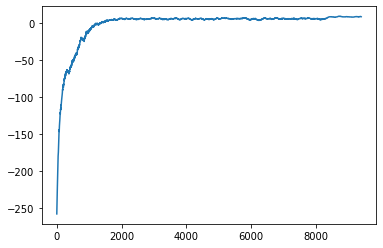

5th percentile = 7.540000000000001
95th percentile = 8.560000000000002
Avg reward = 8.00082082082082
Illegal actions in last 1000 = 0


In [14]:
# Run Q-learning and check rubrics:
estimated_returns_tbl, rewards, had_illegal_action = q_learning(global_taxi, MY_HYPER_PARAMS)

# Calculate a moving average over a sliding window of 100 episodes 
windowed_rewards = np.convolve(rewards, np.ones(100)/100, 'valid')
plt.plot(windowed_rewards[500:])
plt.show()

last_1000_start_idx = MY_HYPER_PARAMS['n_episodes'] - 100 - 1000
avg_reward_last_1000 = windowed_rewards[last_1000_start_idx:(last_1000_start_idx+999)]

avg_reward_5p = np.quantile(avg_reward_last_1000,.05)
avg_reward_95p = np.quantile(avg_reward_last_1000,.95)

print('5th percentile = '+str(avg_reward_5p))
print('95th percentile = '+str(avg_reward_95p))
print('Avg reward = '+str(np.mean(avg_reward_last_1000)))

illegal_actions = np.count_nonzero(had_illegal_action[last_1000_start_idx:])
print('Illegal actions in last 1000 = '+str(illegal_actions))

As seen above:
- the 5th percentile is 7.54>7.2
- the 95th percentile is 8.56>8.2
- no illegal actions are taken in the last 1000 episodes

# Appendix A: SARSA

I largely optimized the hyperparameters for Q-learning, but found that running SARSA with the same hyperparameters also barely satisifies the rubric

100%|██████████| 10000/10000 [02:21<00:00, 70.62it/s]


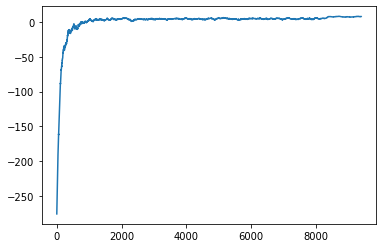

5th percentile = 7.24
95th percentile = 8.23
Avg reward = 7.705195195195195
Illegal actions in last 1000 = 0


In [16]:
MY_HYPER_PARAMS = {}
MY_HYPER_PARAMS['gamma'] = 0.9 # parameter for discounted returns to encourage finding quickest route.
MY_HYPER_PARAMS['n_episodes'] = 10000  # number of episodes to run
MY_HYPER_PARAMS['epsilon_decay'] = 0.99  # controls exploration/exploitation tradeoff
MY_HYPER_PARAMS['min_epsilon'] = 0.05  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
MY_HYPER_PARAMS['alpha'] = 0.1  # effective learning rate telling us how to weight current return against value already in table
MY_HYPER_PARAMS['max_episode_length'] = 100 # max length of episode before forcing a reset in sarsa or q-learning
MY_HYPER_PARAMS['num_exploration_episodes'] = 500  # num episodes to force explore before starting to decay epsilon

# for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
# I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
# Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
MY_HYPER_PARAMS['num_episodes_with_some_exploration'] = MY_HYPER_PARAMS['n_episodes'] - 1102

# Run SARSA and check rubrics:
estimated_returns_tbl, rewards, had_illegal_action = sarsa(global_taxi, MY_HYPER_PARAMS)

# Calculate a moving average over a sliding window of 100 episodes 
windowed_rewards = np.convolve(rewards, np.ones(100)/100, 'valid')
plt.plot(windowed_rewards[500:])
plt.show()

last_1000_start_idx = MY_HYPER_PARAMS['n_episodes'] - 100 - 1000
avg_reward_last_1000 = windowed_rewards[last_1000_start_idx:(last_1000_start_idx+999)]

avg_reward_5p = np.quantile(avg_reward_last_1000,.05)
avg_reward_95p = np.quantile(avg_reward_last_1000,.95)

print('5th percentile = '+str(avg_reward_5p))
print('95th percentile = '+str(avg_reward_95p))
print('Avg reward = '+str(np.mean(avg_reward_last_1000)))

illegal_actions = np.count_nonzero(had_illegal_action[last_1000_start_idx:])
print('Illegal actions in last 1000 = '+str(illegal_actions))


As seen above:
- the 5th percentile is 7.24>7.2
- the 95th percentile is 8.23>8.2
- no illegal actions are taken in the last 1000 episodes
- performance with SARSA is slightly worse than with Q-learning, but still barely satisfies the rubric.  Since it is by a razor-thin margin, it is likely that other runs would not necessarily satisfy the rubric.

# Appendix B:  Visualization and Debugging

I wrote several methods to aid in debugging and visualizing the tables and policies resulting from my implementations above.  I used these methods extensively in PyCharm, and have included them below for completeness.  For example, I wrote a method to pretty-print the returns table with more intuitive state and action labels, and to reorder the states in the table such that states with the same passenger and dest indices are grouped together.  I also wrote a method to pretty-print 8 policy maps: a policy map for each passenger location given that the passenger is not yet in the taxi, so that the taxi should be trying to get to and pick up the passenger, and a policy map for each destination location given that the passenger is already in the taxi, so the taxi should be trying to get to the destination and drop off the passenger.
 

In [17]:
# convert (row, col) to 1-base indices and convert pass and dest indices to intuitive strings
def pretty_decode(local_taxi, s):
    (row, col, pass_idx, dest_idx) = local_taxi.decode(s)
    #pretty_row = row+1
    #pretty_col = col+1
    to_str ={0:'R', 1:'G', 2:'Y', 3:'B', 4:'T'}
    return [row+1, col+1, to_str[pass_idx], to_str[dest_idx]]

# Method to pretty-print the returns table:
# - Using more intuitive state labels, column headings
# - Reorder the states in the table such that states with the same passenger and dest indices are grouped together.
def pretty_print_table(local_taxi, local_table):
    new_table = local_table.copy()

    # Reorder the states in the table such that states with the same passenger and dest indices are grouped together.
    n_rows = local_table.shape[0]
    stride = np.int32(n_rows/25)

    frames = []
    for ii in range(stride):
        frames.append(new_table[ii::stride]) #.loc(list(np.arange(n_rows)[ii::stride])))
        None

    reorder_table = pd.concat(frames) #new_table[::stride] #.loc(list(np.arange(n_rows)[::stride]))


    # Replace numbered rows with [row, col, pass loc, dest] where row and col are 1-based and pass loc and dest idx are in [RGBY]
    pandas_state_pretty_replacer = {}
    for s in range(local_taxi.nS):
        pandas_state_pretty_replacer[s] = '['+ ','.join(
            [str(x) for x in pretty_decode(local_taxi, s)])+']'  # tuple(global_taxi.decode(s))

    reorder_table.rename(index=pandas_state_pretty_replacer, inplace=True)

    # Rename column actions.   Use '+' for pickup and '-' for drop-off
    reorder_table.columns = ['S', 'N', 'E', 'W', '+', '-']

    print(reorder_table)
    return reorder_table

# Method to pretty-print the policies:
# - Prints a policy map for each passenger location given that the passenger is not yet in the taxi, so the taxi should be trying to get to and pick up the passenger
# - Prints a policy map for each destination location given that the passenger is already in the taxi, so the taxi should be trying to get to the destination and drop off the passenger
def pretty_print_policy(taxi, local_policy):
    direction_repr = {1:' 🡑 ', 2:' 🡒 ', 3:' 🡐 ', 0:' 🡓 ', 4:' + ', 5:' - ', None:' ⬤ '}

    # Print policies for states where we are trying to get to passenger, so dest_idx is irrelevant, as long as not = pass_idx

    print('Passenger not in taxi, pass at Red (top left):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 0, 1)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger not in taxi, pass at Green (Top Right):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 1, 0)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger not in taxi, pass at yellow (Bottom Left):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 2, 0)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger not in taxi, pass at Blue (Bottom Right):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 3, 0)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()



    # Print policies for states where we already have passenger and are trying to get to destination, so pass_idx is always 4

    print('Passenger in taxi, Dest = Red (Top Left):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 4, 0)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger in taxi, Dest = Green (Top Right):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 4, 1)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger in taxi, Dest = Yellow (Bottom Left):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 4, 2)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger in taxi, Dest = Blue (Bottom Right):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 4, 3)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

Testing the above methods for the SARSA table and policy derived above:

In [18]:
pretty_estimated_returns = pretty_print_table(global_taxi, estimated_returns_tbl)
pretty_estimated_returns

                   S         N          E          W         +          -
[1,1,R,R]   0.000000  0.000000   0.000000   0.000000  0.000000   0.000000
[1,2,R,R]   0.000000  0.000000   0.000000   0.000000  0.000000   0.000000
[1,3,R,R]   0.000000  0.000000   0.000000   0.000000  0.000000   0.000000
[1,4,R,R]   0.000000  0.000000   0.000000   0.000000  0.000000   0.000000
[1,5,R,R]   0.000000  0.000000   0.000000   0.000000  0.000000   0.000000
...              ...       ...        ...        ...       ...        ...
[5,1,T,B]  -2.332281  4.344930  -1.086661  -2.871355 -9.959252  -4.549767
[5,2,T,B]  -1.972276 -2.067928  -2.046950  -2.155782 -6.369106  -6.240870
[5,3,T,B]  -2.169652 -2.062104  -2.165229  -2.101093 -6.469466  -5.102150
[5,4,T,B]  15.893267  7.425521  10.654095  14.975301  6.997582  20.000000
[5,5,T,B]   2.871712 -0.039446  -0.685568  16.090204 -5.665596  -1.229144

[500 rows x 6 columns]


,S,N,E,W,+,-
"[1,1,R,R]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"[1,2,R,R]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"[1,3,R,R]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"[1,4,R,R]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"[1,5,R,R]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
"[5,1,T,B]",-2.332281,4.344930,-1.086661,-2.871355,-9.959252,-4.549767
"[5,2,T,B]",-1.972276,-2.067928,-2.046950,-2.155782,-6.369106,-6.240870
"[5,3,T,B]",-2.169652,-2.062104,-2.165229,-2.101093,-6.469466,-5.102150
"[5,4,T,B]",15.893267,7.425521,10.654095,14.975301,6.997582,20.000000


In [19]:
# get the greedy policy for each state by looking in the returns table for the action with max return for that state
def greedy_policy_from_returns_tbl(local_table):
    policy = {s: None for s in local_table.index}
    for local_state in local_table.index:
            greedy_action = local_table.loc[local_state].idxmax()
            policy[local_state] = greedy_action
    return policy

greedy_policy = greedy_policy_from_returns_tbl(estimated_returns_tbl)
print(greedy_policy)
pretty_print_policy(global_taxi,greedy_policy)


{0: 0, 1: 4, 2: 4, 3: 4, 4: 2, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0, 10: 0, 11: 2, 12: 0, 13: 0, 14: 0, 15: 0, 16: 5, 17: 2, 18: 0, 19: 0, 20: 0, 21: 3, 22: 3, 23: 0, 24: 0, 25: 0, 26: 3, 27: 0, 28: 3, 29: 0, 30: 0, 31: 0, 32: 0, 33: 3, 34: 3, 35: 0, 36: 3, 37: 0, 38: 3, 39: 0, 40: 0, 41: 2, 42: 0, 43: 0, 44: 2, 45: 0, 46: 2, 47: 2, 48: 2, 49: 0, 50: 0, 51: 0, 52: 2, 53: 2, 54: 0, 55: 0, 56: 0, 57: 2, 58: 2, 59: 2, 60: 0, 61: 0, 62: 3, 63: 3, 64: 2, 65: 0, 66: 2, 67: 2, 68: 2, 69: 3, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 3, 77: 2, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 4, 85: 0, 86: 4, 87: 4, 88: 0, 89: 0, 90: 0, 91: 3, 92: 3, 93: 3, 94: 0, 95: 0, 96: 3, 97: 5, 98: 3, 99: 0, 100: 0, 101: 1, 102: 1, 103: 1, 104: 1, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 1, 117: 2, 118: 0, 119: 0, 120: 0, 121: 3, 122: 3, 123: 3, 124: 0, 125: 0, 126: 0, 127: 0, 128: 3, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 3, 135: 0, 136: 3, 137: 0, 138: 

As seen, the agent has successfully learned not to take any illegal actions.  It is not always taking the shortest possible path (which is probably why the q-learning policy does a better job on the rubrics), but it is generally taking a decent path to complete the objective. 

# Appendix C: State Compression

Inspired by the discussions regarding Hierarchical RL in https://arxiv.org/abs/cs/9905014, I observed that when we consider the empty taxi attempting to find and pick up the passenger, the final destination is irrelevant.  This led me to consider compressing the state space from 5 X 5 X 5 X 4 = 500 states to only 5 X 5 X 2 X 4 = 200 states, where for each of the 25 locations on the map, I can either have an empty or a full taxi, and a single destination in {R, G, B, Y}, where that destination is given by the passenger location when the taxi is empty, and the final destination when the taxi is full.  To implement this, I wrote methods to convert the original state to a compressed state, and to encode and decode compressed states.  I still pass the original state to the taxi step() API, but I use compressed states when populating the table, which is now compressed.  

For the actions, I similarly noted that since the agent is aware of whether it is empty or full, it should never consider doing drop-offs when empty and should never consider doing pick-ups when full, so it is always choosing from 1 of 5 (as opposed to 6) actions:  4 directions and a single combined pickup/dropoff action.

The resulting, modified Q-learning and helper functions are thus as follows:

100%|██████████| 5000/5000 [01:28<00:00, 56.37it/s]


                   S          N         E          W        +/-
[1,1,-,R]   0.503471   1.371662 -0.621951   2.048661   6.849698
[1,2,-,R]  -0.329433   0.065785 -1.379739   4.906872 -10.279443
[1,3,-,R]  -1.636542  -5.709761 -5.741375  -5.705112 -12.618674
[1,4,-,R]  -2.059947  -5.850446 -5.845570  -5.508752 -12.524174
[1,5,-,R]  -5.983507  -5.972340 -5.992501  -3.276214 -13.217079
...              ...        ...       ...        ...        ...
[5,1,+,B]  -1.011996   7.168689 -1.177035  -2.275347  -1.558016
[5,2,+,B]  -1.224790  -1.178931 -1.232774  -1.224790  -1.990000
[5,3,+,B]  -1.216732  -0.796313 -1.216732  -1.205525  -1.900000
[5,4,+,B]  12.187942  10.110043  7.196194  13.412220  25.858181
[5,5,+,B]   0.000000   0.698188  0.000000  20.828247   0.000000

[200 rows x 5 columns]


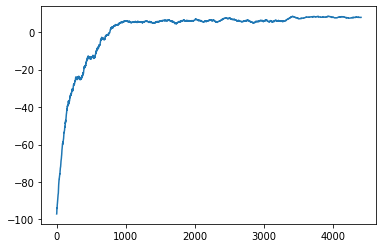

5th percentile = 7.348999999999999
95th percentile = 8.34
Avg reward = 7.916956956956957
Illegal actions in last 1000 = 0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm

import gym


# convert (row, col) to 1-base indices and convert pass and dest indices to intuitive strings
def pretty_decode(local_taxi, s):
    (row, col, pass_idx, dest_idx) = local_taxi.decode(s)
    #pretty_row = row+1
    #pretty_col = col+1
    to_str ={0:'R', 1:'G', 2:'Y', 3:'B', 4:'T'}
    return [row+1, col+1, to_str[pass_idx], to_str[dest_idx]]

def pretty_decode_compressed(local_taxi, compressed_state):
    (row, col, pass_in_taxi, dest_idx) = decode_compressed_state(compressed_state)
    #pretty_row = row+1
    #pretty_col = col+1
    to_str_pass = {0:'-', 1:'+'}
    to_str_dest = {0:'R', 1:'G', 2:'Y', 3:'B', 4:'T'}
    return [row+1, col+1, to_str_pass[pass_in_taxi], to_str_dest[dest_idx]]

def epsilon_greedy_action_from_Q(Q, state, epsilon):
    actions = Q.columns
    action_probs = np.asarray([epsilon / len(actions)] * len(actions), dtype=np.float)

    greedy_action_index = np.argmax(Q.loc[state].values)
    action_probs[greedy_action_index] += 1 - epsilon

    epsilon_greedy_action = np.random.choice(Q.columns, p=action_probs)

    return epsilon_greedy_action

'''
def epsilon_greedy_action_compressed(Q, compressed_state, epsilon):
    actions = Q.columns
    action_probs = np.asarray([epsilon / len(actions)] * len(actions), dtype=np.float)

    greedy_action_index = np.argmax(Q.loc[compressed_state].values)
    action_probs[greedy_action_index] += 1 - epsilon

    epsilon_greedy_action = np.random.choice(Q.columns, p=action_probs)

    return epsilon_greedy_action
'''

# state compression

def encode_compressed_state(taxi_row, taxi_col, pass_loc, dest_idx):
    # (5) 5, 2, 4
    i = taxi_row
    i *= 5
    i += taxi_col
    i *= 2 # passenger is either in taxi or not in taxi
    i += pass_loc
    i *= 4
    i += dest_idx  # passenger loc if passenger not in taxi, else dest loc
    return i

def decode_compressed_state(i):
    dest_idx = i%4
    i = i//4
    pass_in_taxi = i%2
    i = i//2
    col_idx = i%5
    i = i//5
    row_idx = i%5
    assert 0 <= i < 5
    return row_idx, col_idx, pass_in_taxi, dest_idx

def compress_state(local_taxi, original_state):
    (row, col, pass_idx, dest_idx) = local_taxi.decode(original_state)
    if(pass_idx==4):
        pass_in_taxi = 1
    else:  # not yet in taxi, so destination is irrelevant.  we should use the passenger index as the current destination
        pass_in_taxi = 0
        dest_idx = pass_idx
    return encode_compressed_state(row, col, pass_in_taxi, dest_idx)

def decompress_state(local_taxi, compressed_state):
    (row, col, pass_in_taxi, current_dest_idx) = decode_compressed_state(compressed_state)
    if (pass_in_taxi == 1):
        return local_taxi.encode(row, col, 4, current_dest_idx)
    else:  # not yet in taxi, so destination is irrelevant.  The current destination is the pass_idx.  dest_idx is irrelevant and just needs to not equal pass_idx
        return local_taxi.encode(row, col, current_dest_idx, (current_dest_idx+1) %4)

# Exploit fact that destination is irrelevant during pickup by combining knowledge for all dest_idx when pass_idx!=4
# Never do dropoff when pass_idx!=4
# Never do pickup when pass_idx=4
def q_learning_combine_states(taxi, HYPER_PARAMS):

    actions_np = np.arange(5) # only 5 actions since will force no pickup when pass in taxi and no dropoff otherwise
    states_np = np.arange(5*5*2*4) # compress to 25*8=200 states by using a single destination which is set to passenger loc when passenger not in taxi and to dest when passenger in taxi

    gamma = HYPER_PARAMS['gamma'] # parameter for discounted returns to encourage finding quickest route
    n_episodes = HYPER_PARAMS['n_episodes']   # number of episodes to run
    epsilon_decay = HYPER_PARAMS['epsilon_decay']   # controls exploration/exploitation tradeoff
    min_epsilon = HYPER_PARAMS['min_epsilon']  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
    alpha = HYPER_PARAMS['alpha'] # effective learning rate telling us how to weight current return against value already in table

    max_episode_length = HYPER_PARAMS['max_episode_length'] # max length of episode before forcing a reset in sarsa or q-learning
    num_exploration_episodes = HYPER_PARAMS['num_exploration_episodes'] # num episodes to force explore before starting to decay epsilon
    num_episodes_with_some_exploration = HYPER_PARAMS['num_episodes_with_some_exploration']

    Q = pd.DataFrame.from_dict({s: {a: 0 for a in actions_np} for s in states_np}, orient='index')

    epsilon = 1
    rewards = np.zeros(n_episodes)
    had_illegal_action = np.zeros(n_episodes) # 0 if no illegal action in the episode.  1 if had illegal action

    for i in tqdm(range(n_episodes)):
        s0 = taxi.reset()
        compressed_s0 = compress_state(taxi, s0)
        #s0 = foolsball.init_state
        done = False
        current_episode_length=0
        episode_reward = 0
        episode_had_illegal_action = 0

        while (not done) and (current_episode_length < max_episode_length):

            a0 = epsilon_greedy_action_from_Q(Q, compressed_s0, epsilon) # will be 0->4 since only have 5 actions
            (row_idx, col_idx, pass_in_taxi, dest_idx) = decode_compressed_state(compressed_s0)
            #(row, col, pass_pretty, dest_pretty) = pretty_decode(taxi, s0)

            if a0 == 4:  # select pickup/dropoff based on state
                if pass_in_taxi == 1:  # passenger in taxi, always do dropoff, never pickup
                    s1, reward, done, dummy_prob = taxi.step(5)
                else:  # passenger not in taxi, always do pickup, never dropoff
                    s1, reward, done, dummy_prob = taxi.step(4)
            else: # do standard directional action
                s1, reward, done, dummy_prob = taxi.step(a0)

            compressed_s1 = compress_state(taxi, s1)

            Q.loc[compressed_s0, a0] += alpha * (reward + gamma * Q.loc[compressed_s1].max() - Q.loc[compressed_s0, a0])
            compressed_s0 = compressed_s1
            current_episode_length = current_episode_length+1

            # For the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
            # I will therefore force my epsilon to zero after a certain number of episodes, after which the below will be based on greedy
            # actions instead of epsilon-greedy
            episode_reward += reward
            if reward == -10:
                episode_had_illegal_action = 1

        if i > num_exploration_episodes:
            epsilon *= epsilon_decay
            epsilon = max(epsilon, min_epsilon)

        # for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
        # I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
        # Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
        if i > num_episodes_with_some_exploration:
            epsilon = 0

        rewards[i] = episode_reward
        had_illegal_action[i] = episode_had_illegal_action

    return Q, rewards, had_illegal_action


def pretty_print_table(local_taxi, local_table):
    new_table = local_table.copy()
    num_states = 5*5*2*4

    # Reorder the states in the table such that states with the same passenger and dest indices are grouped together.
    n_rows = local_table.shape[0]
    stride = np.int32(n_rows/25)

    frames = []
    for ii in range(stride):
        frames.append(new_table[ii::stride]) #.loc(list(np.arange(n_rows)[ii::stride])))
        None

    reorder_table = pd.concat(frames) #new_table[::stride] #.loc(list(np.arange(n_rows)[::stride]))


    # Replace numbered rows with [row, col, pass loc, dest] where row and col are 1-based and pass loc and dest idx are in [RGBY]
    pandas_state_pretty_replacer = {}
    for s in range(num_states):
        pandas_state_pretty_replacer[s] = '['+ ','.join(
            [str(x) for x in pretty_decode_compressed(local_taxi, s)])+']'  # tuple(global_taxi.decode(s))

    reorder_table.rename(index=pandas_state_pretty_replacer, inplace=True)

    # Rename column actions.   Use '+' for pickup and '-' for drop-off
    reorder_table.columns = ['S', 'N', 'E', 'W', '+/-']

    print(reorder_table)
    return reorder_table

def greedy_policy_from_returns_tbl(local_table):
    policy = {s: None for s in local_table.index}
    for local_state in local_table.index:
            greedy_action = local_table.loc[local_state].idxmax()
            policy[local_state] = greedy_action
    return policy

# set up hyper-parameters
MY_HYPER_PARAMS = {}
MY_HYPER_PARAMS['gamma'] = 0.9 # parameter for discounted returns to encourage finding quickest route.
MY_HYPER_PARAMS['n_episodes'] = 5000  # number of episodes to run
MY_HYPER_PARAMS['epsilon_decay'] = 0.99  # controls exploration/exploitation tradeoff
MY_HYPER_PARAMS['min_epsilon'] = 0.05  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
MY_HYPER_PARAMS['alpha'] = 0.1  # effective learning rate telling us how to weight current return against value already in table
MY_HYPER_PARAMS['max_episode_length'] = 50 # max length of episode before forcing a reset in sarsa or q-learning
MY_HYPER_PARAMS['num_exploration_episodes'] = 500  # num episodes to force explore before starting to decay epsilon

# for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
# I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
# Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
MY_HYPER_PARAMS['num_episodes_with_some_exploration'] = MY_HYPER_PARAMS['n_episodes'] - 1102

global_taxi = gym.make('Taxi-v3')

estimated_returns_tbl, rewards, had_illegal_action = q_learning_combine_states(global_taxi, MY_HYPER_PARAMS)

pretty_estimated_returns = pretty_print_table(global_taxi, estimated_returns_tbl)

windowed_rewards = np.convolve(rewards, np.ones(100)/100, 'valid')
plt.plot(windowed_rewards[500:])
plt.show()

last_1000_start_idx = MY_HYPER_PARAMS['n_episodes'] - 100 - 1000
avg_reward_last_1000 = windowed_rewards[last_1000_start_idx:(last_1000_start_idx+999)]

avg_reward_5p = np.quantile(avg_reward_last_1000,.05)
avg_reward_95p = np.quantile(avg_reward_last_1000,.95)

print('5th percentile = '+str(avg_reward_5p))
print('95th percentile = '+str(avg_reward_95p))
print('Avg reward = '+str(np.mean(avg_reward_last_1000)))

illegal_actions = np.count_nonzero(had_illegal_action[last_1000_start_idx:])
print('Illegal actions in last 1000 = '+str(illegal_actions))

As seen, the state and action spaces have been successfully compressed to 200 and 5, respectively, and we are still getting a good policy which passes the rubric.  Convergence also appears to be faster, which is as expected due to the reduced space of possible states and actions.

# Appendix D:  Extreme state compression

Taking the approach in Appendix C a step further, I started thinking about whether I could combine the (taxi) empty and full states.  Specifically, as in Hierarchical RL, I wanted to be able to simply have the taxi learn how to get to a point in {R, G, B, Y}, and then re-use that knowledge for both the task of finding the passenger and the task of dropping the passenger off.  As such, I want to compress the state space even further to just 5 x 5 X 4 = 100 states, where I only have one compressed state (meaning a single policy) for each taxi location and destination in {R, G, B, Y}.  

As the compressed state now only captures the taxi location and current (possibly temporary) destination, I would ideally like to avoid worrying about pickup and dropoff entirely, since I won't know from the compressed state whether to do a pickup or dropoff (since the compressed state does not capture whether the taxi is empty).  As such, I will always choose a direction as my action, and I will automatically do a pickup or a dropoff (based on whether my decompressed state indicates the taxi is empty or full, respectively) when I arrive at my destination.  Note that to do this, I now need to peek into the API to check whether I have arrived at my current destination; if so, I will force a pickup if the taxi is empty and a dropoff if the taxi is full.  The agent is thus always only choosing from among the 4 directional actions.

100%|██████████| 2000/2000 [00:28<00:00, 70.88it/s]


                 S          N         E          W
[1,1,R]   0.000000  19.761173  0.000000   2.385010
[1,2,R]  -0.305531  -0.297010 -0.361000  13.483134
[1,3,R]   3.612764  -2.602996 -2.638897  -2.643312
[1,4,R]   3.136914  -2.846262 -2.954651  -2.868133
[1,5,R]   3.340787  -3.304139 -3.214788  -3.041272
...            ...        ...       ...        ...
[5,1,B]  -3.753734   5.509521 -3.695630  -3.764746
[5,2,B]  -2.449901   4.777026 -2.459400  -2.448417
[5,3,B]  -2.299569   6.424202 -2.292497  -2.309413
[5,4,B]  20.334750  -0.100000 -0.132944   3.862554
[5,5,B]  -0.413445  -0.593693 -0.585199  15.027878

[100 rows x 4 columns]
{0: 1, 1: 0, 2: 0, 3: 0, 4: 3, 5: 0, 6: 0, 7: 0, 8: 0, 9: 2, 10: 0, 11: 0, 12: 0, 13: 2, 14: 0, 15: 0, 16: 0, 17: 1, 18: 3, 19: 0, 20: 1, 21: 2, 22: 0, 23: 0, 24: 3, 25: 0, 26: 0, 27: 0, 28: 0, 29: 2, 30: 0, 31: 2, 32: 0, 33: 2, 34: 0, 35: 0, 36: 3, 37: 1, 38: 3, 39: 3, 40: 1, 41: 2, 42: 0, 43: 2, 44: 1, 45: 2, 46: 3, 47: 2, 48: 3, 49: 2, 50: 3, 51: 2, 52: 3, 53

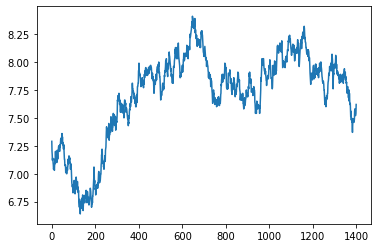

5th percentile = 7.61
95th percentile = 8.22
Avg reward = 7.910990990990991
Illegal actions in last 1000 = 0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm

import gym


# convert (row, col) to 1-base indices and convert pass and dest indices to intuitive strings
def pretty_decode(local_taxi, s):
    (row, col, pass_idx, dest_idx) = local_taxi.decode(s)
    #pretty_row = row+1
    #pretty_col = col+1
    to_str ={0:'R', 1:'G', 2:'Y', 3:'B', 4:'T'}
    return [row+1, col+1, to_str[pass_idx], to_str[dest_idx]]

def pretty_decode_compressed(local_taxi, compressed_state):
    (row, col, dest_idx) = decode_compressed_state(compressed_state)
    to_str_dest = {0:'R', 1:'G', 2:'Y', 3:'B'}
    return [row+1, col+1, to_str_dest[dest_idx]]

def epsilon_greedy_action_from_Q(Q, state, epsilon):
    actions = Q.columns
    action_probs = np.asarray([epsilon / len(actions)] * len(actions), dtype=np.float)

    greedy_action_index = np.argmax(Q.loc[state].values)
    action_probs[greedy_action_index] += 1 - epsilon

    epsilon_greedy_action = np.random.choice(Q.columns, p=action_probs)

    return epsilon_greedy_action


# state compression

def encode_compressed_state(taxi_row, taxi_col, dest_idx):
    # (5) 5, 2, 4
    i = taxi_row
    i *= 5
    i += taxi_col
    i *= 4
    i += dest_idx  # passenger loc if passenger not in taxi, else dest loc
    return i

def decode_compressed_state(i):
    dest_idx = i%4
    i = i//4
    col_idx = i%5
    i = i//5
    row_idx = i%5
    assert 0 <= i < 5
    return row_idx, col_idx, dest_idx

def compress_state(local_taxi, original_state):
    (row, col, pass_idx, dest_idx) = local_taxi.decode(original_state)
    if(pass_idx==4):
        return encode_compressed_state(row, col, dest_idx)
    else:  # not yet in taxi, so destination is irrelevant.  we should use the passenger index as the current destination
        return encode_compressed_state(row, col, pass_idx)

'''
def decompress_state(local_taxi, compressed_state, pass_in_taxi):
    (row, col, current_dest_idx) = decode_compressed_state(compressed_state)
    if (pass_in_taxi == 1):
        return local_taxi.encode(row, col, 4, current_dest_idx)
    else:  # not yet in taxi, so destination is irrelevant.  The current destination is the pass_idx.  dest_idx is irrelevant and just needs to not equal pass_idx
        return local_taxi.encode(row, col, current_dest_idx, (current_dest_idx+1) %4)
'''

# Will construct a table where we only care about the destination, which will be pass_loc when pass not in taxi, or dest_idx when pass in taxi
# This should allow cross-learning between the 2 phases (pickup and dropoff)
# Once reach destination, will automatically do the appropriate pickup or dropoff action, and assign a reward, so only 4 directional actions will typically be considered
def q_learning_extreme_compression(taxi, HYPER_PARAMS):

    actions_np = np.arange(4) # only 4 actions since agent will only consider directions
    states_np = np.arange(5*5*4) # compress to 25*4=100 states by using a single destination which is set to passenger loc when passenger not in taxi and to dest when passenger in taxi

    gamma = HYPER_PARAMS['gamma'] # parameter for discounted returns to encourage finding quickest route
    n_episodes = HYPER_PARAMS['n_episodes']   # number of episodes to run
    epsilon_decay = HYPER_PARAMS['epsilon_decay']   # controls exploration/exploitation tradeoff
    min_epsilon = HYPER_PARAMS['min_epsilon']  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
    alpha = HYPER_PARAMS['alpha'] # effective learning rate telling us how to weight current return against value already in table

    max_episode_length = HYPER_PARAMS['max_episode_length'] # max length of episode before forcing a reset in sarsa or q-learning
    num_exploration_episodes = HYPER_PARAMS['num_exploration_episodes'] # num episodes to force explore before starting to decay epsilon
    num_episodes_with_some_exploration = HYPER_PARAMS['num_episodes_with_some_exploration']

    Q = pd.DataFrame.from_dict({s: {a: 0 for a in actions_np} for s in states_np}, orient='index')

    epsilon = 1
    rewards = np.zeros(n_episodes)
    had_illegal_action = np.zeros(n_episodes) # 0 if no illegal action in the episode.  1 if had illegal action

    for i in tqdm(range(n_episodes)):
        s0 = taxi.reset()
        compressed_s0 = compress_state(taxi, s0)
        done = False
        current_episode_length=0
        episode_reward = 0
        episode_had_illegal_action = 0

        while (not done) and (current_episode_length < max_episode_length):

            a0 = epsilon_greedy_action_from_Q(Q, compressed_s0, epsilon) # will be 0->3 since agent will only consider directions
            s1, reward, done, dummy_prob = taxi.step(a0)
            episode_reward += reward
            if reward == -10:
                episode_had_illegal_action = 1

            compressed_s1 = compress_state(taxi, s1)
            Q.loc[compressed_s0, a0] += alpha * (reward + gamma * Q.loc[compressed_s1].max() - Q.loc[compressed_s0, a0])
            compressed_s0 = compressed_s1

            # check if at destination.  if so, do a pickup or a dropoff
            (row_idx, col_idx, pass_loc, dest_idx) = taxi.decode(s1)

            if(pass_loc==4): # passenger in taxi
                if((row_idx, col_idx)==taxi.locs[dest_idx]): # do a dropoff
                    s1, reward, done, dummy_prob = taxi.step(5)
                    compressed_s1 = compress_state(taxi, s1)
                    episode_reward += reward
                    if reward == -10:
                        episode_had_illegal_action = 1
                    assert done == True  # this better trigger done
                    Q.loc[compressed_s0, a0] += alpha * (
                                reward + gamma * Q.loc[compressed_s1].max() - Q.loc[compressed_s0, a0])
                    compressed_s0 = compressed_s1
            else:  # passenger not in taxi
                if((row_idx, col_idx)==taxi.locs[pass_loc]): # do a pickup
                    s1, reward, done, dummy_prob = taxi.step(4)
                    compressed_s1 = compress_state(taxi, s1)
                    episode_reward += reward
                    if reward == -10:
                        episode_had_illegal_action = 1
                    Q.loc[compressed_s0, a0] += alpha * (
                                reward + gamma * Q.loc[compressed_s1].max() - Q.loc[compressed_s0, a0])
                    compressed_s0 = compressed_s1
                    # after doing the pickup, compress_state should automatically switch the compressed state's destination to be dest_idx

            current_episode_length = current_episode_length+1

        if i > num_exploration_episodes:
            epsilon *= epsilon_decay
            epsilon = max(epsilon, min_epsilon)

        # for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
        # I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
        # Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
        if i > num_episodes_with_some_exploration:
            epsilon = 0

        rewards[i] = episode_reward
        had_illegal_action[i] = episode_had_illegal_action

    return Q, rewards, had_illegal_action


def pretty_print_table(local_taxi, local_table):
    new_table = local_table.copy()
    num_states = 5*5*4

    # Reorder the states in the table such that states with the same passenger and dest indices are grouped together.
    n_rows = local_table.shape[0]
    stride = np.int32(n_rows/25)

    frames = []
    for ii in range(stride):
        frames.append(new_table[ii::stride]) #.loc(list(np.arange(n_rows)[ii::stride])))
        None

    reorder_table = pd.concat(frames) #new_table[::stride] #.loc(list(np.arange(n_rows)[::stride]))


    # Replace numbered rows with [row, col, pass loc, dest] where row and col are 1-based and pass loc and dest idx are in [RGBY]
    pandas_state_pretty_replacer = {}
    for s in range(num_states):
        pandas_state_pretty_replacer[s] = '['+ ','.join(
            [str(x) for x in pretty_decode_compressed(local_taxi, s)])+']'  # tuple(global_taxi.decode(s))

    reorder_table.rename(index=pandas_state_pretty_replacer, inplace=True)

    # Rename column actions.   Use '+' for pickup and '-' for drop-off
    reorder_table.columns = ['S', 'N', 'E', 'W']

    print(reorder_table)
    return reorder_table

def greedy_policy_from_returns_tbl(local_table):
    policy = {s: None for s in local_table.index}
    for local_state in local_table.index:
            greedy_action = local_table.loc[local_state].idxmax()
            policy[local_state] = greedy_action
    return policy

MAP = [
    "+---------+",
    "|R: | : :G|",
    "| : | : : |",
    "| : : : : |",
    "| | : | : |",
    "|Y| : |B: |",
    "+---------+",
]

def pretty_print_policy(taxi, local_policy):
    direction_repr = {1:' 🡑 ', 2:' 🡒 ', 3:' 🡐 ', 0:' 🡓 '}

    # Print policy for each destination.  Policy is same regardless of whether trying to get to passenger or destination
    print('Goto Red (top left):')
    for row in range(5):
        for col in range(5):
            state = encode_compressed_state(row, col, 0)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Goto Green (Top Right):')
    for row in range(5):
        for col in range(5):
            state = encode_compressed_state(row, col, 1)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Goto Yellow (Bottom Left):')
    for row in range(5):
        for col in range(5):
            state = encode_compressed_state(row, col, 2)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Goto Blue (Bottom Right):')
    for row in range(5):
        for col in range(5):
            state = encode_compressed_state(row, col, 3)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()



# set up hyper-parameters
MY_HYPER_PARAMS = {}
MY_HYPER_PARAMS['gamma'] = 0.9 # parameter for discounted returns to encourage finding quickest route.
MY_HYPER_PARAMS['n_episodes'] = 2000  # number of episodes to run
MY_HYPER_PARAMS['epsilon_decay'] = 0.9  # controls exploration/exploitation tradeoff
MY_HYPER_PARAMS['min_epsilon'] = 0.05  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
MY_HYPER_PARAMS['alpha'] = 0.1  # effective learning rate telling us how to weight current return against value already in table
MY_HYPER_PARAMS['max_episode_length'] = 50 # max length of episode before forcing a reset in sarsa or q-learning
MY_HYPER_PARAMS['num_exploration_episodes'] = 0  # num episodes to force explore before starting to decay epsilon

# for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
# I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
# Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
MY_HYPER_PARAMS['num_episodes_with_some_exploration'] = MY_HYPER_PARAMS['n_episodes'] - 1102

global_taxi = gym.make('Taxi-v3')

estimated_returns_tbl, rewards, had_illegal_action = q_learning_extreme_compression(global_taxi, MY_HYPER_PARAMS)

pretty_estimated_returns = pretty_print_table(global_taxi, estimated_returns_tbl)

greedy_policy = greedy_policy_from_returns_tbl(estimated_returns_tbl)
print(greedy_policy)
pretty_print_policy(global_taxi, greedy_policy)

windowed_rewards = np.convolve(rewards, np.ones(100)/100, 'valid')
plt.plot(windowed_rewards[500:])
plt.show()

last_1000_start_idx = MY_HYPER_PARAMS['n_episodes'] - 100 - 1000
avg_reward_last_1000 = windowed_rewards[last_1000_start_idx:(last_1000_start_idx+999)]

avg_reward_5p = np.quantile(avg_reward_last_1000,.05)
avg_reward_95p = np.quantile(avg_reward_last_1000,.95)

print('5th percentile = '+str(avg_reward_5p))
print('95th percentile = '+str(avg_reward_95p))
print('Avg reward = '+str(np.mean(avg_reward_last_1000)))

illegal_actions = np.count_nonzero(had_illegal_action[last_1000_start_idx:])
print('Illegal actions in last 1000 = '+str(illegal_actions))



As seen, due to the heavily compressed state and action spaces, we can very quickly converge to an excellent policy and meet the rubric.  The only downside is that it required knowledge of whether the taxi is at its temporary destination (the passenger if empty or the final destination if full.)

# Appendix E:  Dynamic Programming

As another debugging step, I also implemented the dynamic programming approach we discussed towards the beginning of the course.  Although this required knowledge of the environment that is not normally available to the agent, this provided a baseline for an ideal policy and the corresponding rewards that can be reasonably acheivable. Although I implemented this algorithm first when working on the project, I only included it at the very end here to emphasize that the "cheat" methods below are never used above.

  2%|▏         | 23/1200 [00:00<00:05, 227.08it/s]


Convergence achieved at 19 iterations
                  S         N         E         W          +          -
[1,1,R,R] -2.710000 -1.900000 -2.710000 -1.900000  -1.000000 -10.900000
[1,2,R,R] -3.439000 -2.710000 -2.710000 -1.900000 -11.710000 -11.710000
[1,3,R,R] -5.217031 -5.695328 -6.125795 -5.695328 -14.695328 -14.695328
[1,4,R,R] -5.695328 -6.125795 -6.513216 -5.695328 -15.125795 -15.125795
[1,5,R,R] -6.125795 -6.513216 -6.513216 -6.125795 -15.513216 -15.513216
...             ...       ...       ...       ...        ...        ...
[5,1,T,B] -5.695328 -5.217031 -5.695328 -5.695328 -14.695328  -6.125795
[5,2,T,B] -5.217031 -4.685590 -4.685590 -5.217031 -14.217031 -14.217031
[5,3,T,B] -4.685590 -4.095100 -4.685590 -5.217031 -13.685590 -13.685590
[5,4,T,B] -1.000000 -1.900000 -1.900000 -1.000000 -10.000000   0.000000
[5,5,T,B] -1.900000 -2.710000 -1.900000 -1.000000 -10.900000 -10.900000

[500 rows x 6 columns]
{0: 4, 1: 4, 2: 4, 3: 4, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0

100%|██████████| 1200/1200 [00:05<00:00, 205.32it/s]


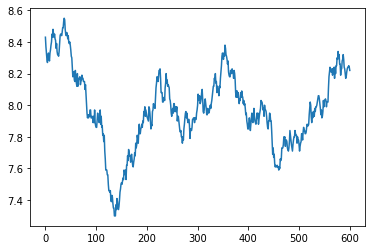

5th percentile = 7.588999999999999
95th percentile = 8.36
Avg reward = 7.967927927927928
Illegal actions in last 1000 = 0


In [3]:
# Use dynamic programming with "genie" methods allowing extensive visibility into the environment
# Would normally not have this level of visibility, but this is useful for getting a sense of the best acheivable policy and rewards, as a point of comparison

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm

import gym

def __is_done__(taxi, local_state, local_action):
    return taxi.P[local_state][local_action][0][3] # TODO:  check with Farhan whether this is kosher, or whether I need to explicitly write the code for this

def __get_next_state_on_action__(taxi, local_state, local_action):
    return taxi.P[local_state][local_action][0][1]

def __get_reward_for_action__(taxi, local_state, local_action):
    return taxi.P[local_state][local_action][0][2]

def compute_returns(taxi, table, state, action, HYPER_PARAMS, debug=True):
    """ Recursively compute the discounted return for a (state,action) pair"""
    if not __is_done__(taxi, state, action):
        next_state = __get_next_state_on_action__(taxi, state, action)
        reward = __get_reward_for_action__(taxi, state, action)
        actions_np = np.arange(taxi.nA)

        update = HYPER_PARAMS['gamma'] * \
                 max(table.loc[next_state, actions_np[0]],
                     table.loc[next_state, actions_np[1]],
                     table.loc[next_state, actions_np[2]],
                     table.loc[next_state, actions_np[3]],
                     table.loc[next_state, actions_np[4]],
                     table.loc[next_state, actions_np[5]],
                     )

        table.loc[state, action] = reward + update

    return table.loc[state, action]

def dynamic_programming(taxi, HYPER_PARAMS):
    actions_np = np.arange(taxi.nA)
    states_np = np.arange(taxi.nS)
    RETURNS_TBL = pd.DataFrame.from_dict({s: {a: 0 for a in actions_np} for s in states_np}, orient='index')
    for i in range(1, 100):
        RETURNS_TBL_OLD = RETURNS_TBL.copy()
        for s in states_np:
            for a in actions_np:
                compute_returns(taxi, RETURNS_TBL, s, a, HYPER_PARAMS) #, debug=True)

        deltas = RETURNS_TBL - RETURNS_TBL_OLD
        if abs(deltas.values).max() < 1e-3:
            print(f'\nConvergence achieved at {i} iterations')
            break
    return RETURNS_TBL

def epsilon_greedy_action_from_Q(Q, state, epsilon):
    actions = Q.columns
    action_probs = np.asarray([epsilon / len(actions)] * len(actions), dtype=np.float)

    greedy_action_index = np.argmax(Q.loc[state].values)
    action_probs[greedy_action_index] += 1 - epsilon

    epsilon_greedy_action = np.random.choice(Q.columns, p=action_probs)

    return epsilon_greedy_action

def get_rewards(taxi, Q, HYPER_PARAMS):

    actions_np = np.arange(taxi.nA)
    states_np = np.arange(taxi.nS)

    gamma = 1 # no discounting
    n_episodes = HYPER_PARAMS['n_episodes']   # number of episodes to run
    epsilon_decay = HYPER_PARAMS['epsilon_decay']   # controls exploration/exploitation tradeoff
    min_epsilon = HYPER_PARAMS['min_epsilon']  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
    alpha = HYPER_PARAMS['alpha'] # effective learning rate telling us how to weight current return against value already in table

    max_episode_length = HYPER_PARAMS['max_episode_length'] # max length of episode before forcing a reset in sarsa or q-learning
    num_exploration_episodes = HYPER_PARAMS['num_exploration_episodes'] # num episodes to force explore before starting to decay epsilon
    num_episodes_with_some_exploration = HYPER_PARAMS['num_episodes_with_some_exploration']


    epsilon = 0 # force greedy actions
    rewards = np.zeros(n_episodes)
    had_illegal_action = np.zeros(n_episodes) # 0 if no illegal action in the episode.  1 if had illegal action


    for i in tqdm(range(n_episodes)):
        s0 = taxi.reset()
        #s0 = foolsball.init_state
        done = False
        current_episode_length=0
        episode_reward = 0
        episode_had_illegal_action = 0

        while (not done) and (current_episode_length < max_episode_length):
            a0 = epsilon_greedy_action_from_Q(Q, s0, 0)
            s1, reward, done, dummy_prob = taxi.step(a0)
            # Q.loc[s0, a0] += alpha * (reward + gamma * Q.loc[s1].max() - Q.loc[s0, a0])
            s0 = s1
            current_episode_length = current_episode_length+1

            # For the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
            # I will therefore force my epsilon to zero after a certain number of episodes, after which the below will be based on greedy
            # actions instead of epsilon-greedy
            episode_reward += reward
            if reward == -10:
                episode_had_illegal_action = 1

        rewards[i] = episode_reward
        had_illegal_action[i] = episode_had_illegal_action

    return rewards, had_illegal_action


    return RETURNS_TBL


def greedy_policy_from_returns_tbl(local_table):
    policy = {s: None for s in local_table.index}
    for local_state in local_table.index:
            greedy_action = local_table.loc[local_state].idxmax()
            policy[local_state] = greedy_action
    return policy

def calculate_policy_reward(taxi, local_policy, gamma=1):
    local_state = taxi.reset()
    taxi.render()
    _return_ = 0
    discount_coeff = 1
    local_act = local_policy[local_state]
    max_episode_length = 100 # max length of episode before force quit to avoid loop
    episode_length = 0
    while episode_length < max_episode_length:
        local_state, reward, done, dummy_prob = taxi.step(local_act)
        _return_ += discount_coeff * reward
        discount_coeff *= gamma
        taxi.render()
        if done:
            print(f'Return (accumulated reward): {_return_}')
            return _return_
        else:
            local_act = local_policy[local_state]
            episode_length = episode_length+1

    print(f'Reached max_episode_length.  Return (accumulated reward): {_return_}')
    return _return_


MAP = [
    "+---------+",
    "|R: | : :G|",
    "| : | : : |",
    "| : : : : |",
    "| | : | : |",
    "|Y| : |B: |",
    "+---------+",
]


# convert (row, col) to 1-base indices and convert pass and dest indices to intuitive strings
def pretty_decode(local_taxi, s):
    (row, col, pass_idx, dest_idx) = local_taxi.decode(s)
    #pretty_row = row+1
    #pretty_col = col+1
    to_str ={0:'R', 1:'G', 2:'Y', 3:'B', 4:'T'}
    return [row+1, col+1, to_str[pass_idx], to_str[dest_idx]]


def pretty_print_table(local_taxi, local_table):
    new_table = local_table.copy()

    # Group all states with same row,column together
    n_rows = local_table.shape[0]
    stride = np.int32(n_rows/25)

    frames = []
    for ii in range(stride):
        frames.append(new_table[ii::stride]) #.loc(list(np.arange(n_rows)[ii::stride])))
        None

    reorder_table = pd.concat(frames) #new_table[::stride] #.loc(list(np.arange(n_rows)[::stride]))


    # Replace numbered rows with [row, col, pass loc, dest] where row and col are 1-based and pass loc and dest idx are in [RGBY]
    pandas_state_pretty_replacer = {}
    for s in range(local_taxi.nS):
        pandas_state_pretty_replacer[s] = '['+ ','.join(
            [str(x) for x in pretty_decode(local_taxi, s)])+']'  # tuple(global_taxi.decode(s))

    reorder_table.rename(index=pandas_state_pretty_replacer, inplace=True)

    # Rename column actions.   Use '+' for pickup and '-' for drop-off
    reorder_table.columns = ['S', 'N', 'E', 'W', '+', '-']

    print(reorder_table)
    return reorder_table


def pretty_print_policy(taxi, local_policy):
    direction_repr = {1:' 🡑 ', 2:' 🡒 ', 3:' 🡐 ', 0:' 🡓 ', 4:' + ', 5:' - ', None:' ⬤ '}


    # Print policies for states where we are trying to get to passenger, so dest_idx is irrelevant, as long as not = pass_idx

    print('Passenger not in taxi, pass at Red (top left):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 0, 1)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger not in taxi, pass at Green (Top Right):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 1, 0)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger not in taxi, pass at yellow (Bottom Left):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 2, 0)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger not in taxi, pass at Blue (Bottom Right):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 3, 0)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()



    # Print policies for states where we already have passenger and are trying to get to destination, so pass_idx is always 4

    print('Passenger in taxi, Dest = Red (Top Left):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 4, 0)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger in taxi, Dest = Green (Top Right):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 4, 1)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger in taxi, Dest = Yellow (Bottom Left):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 4, 2)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()

    print('Passenger in taxi, Dest = Blue (Bottom Right):')
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, 4, 3)
            print(MAP[row+1][2*col],end='')
            print(direction_repr[local_policy[state]],end='')
        print()


# set up hyper-parameters
MY_HYPER_PARAMS = {}
MY_HYPER_PARAMS['gamma'] = 0.9 # parameter for discounted returns to encourage finding quickest route.
MY_HYPER_PARAMS['n_episodes'] = 1200  # number of episodes to run
MY_HYPER_PARAMS['epsilon_decay'] = 0.99  # controls exploration/exploitation tradeoff
MY_HYPER_PARAMS['min_epsilon'] = 0.05  # controls at what point to stop decaying epsilon (e.g., max exploitation we allow)
MY_HYPER_PARAMS['alpha'] = 0.1  # effective learning rate telling us how to weight current return against value already in table
MY_HYPER_PARAMS['max_episode_length'] = 50 # max length of episode before forcing a reset in sarsa or q-learning
MY_HYPER_PARAMS['num_exploration_episodes'] = 500  # num episodes to force explore before starting to decay epsilon

# for the rubric, need to calculate the reward and check whether illegal actions taken based on greedy choice:  epsilon=0
# I will therefore force my epsilon to zero after a certain number (num_episodes_with_some_exploration) of episodes.
# Will generally want this to be ~ 1100 less than total num episodes so that get at least 1100 episodes for rubric
MY_HYPER_PARAMS['num_episodes_with_some_exploration'] = MY_HYPER_PARAMS['n_episodes'] - 1102

global_taxi = gym.make('Taxi-v3')

estimated_returns_tbl = dynamic_programming(global_taxi, MY_HYPER_PARAMS) #dynamic_programming(taxi, MY_HYPER_PARAMS) # ESTIMATED_RETURNS_TBL

pretty_estimated_returns = pretty_print_table(global_taxi, estimated_returns_tbl)


greedy_policy = greedy_policy_from_returns_tbl(estimated_returns_tbl)
print(greedy_policy)

pretty_print_policy(global_taxi, greedy_policy)

#random_initial_state = taxi.reset()
#policy_reward = calculate_policy_reward(global_taxi, q_policy)

rewards, had_illegal_action = get_rewards(global_taxi, estimated_returns_tbl, MY_HYPER_PARAMS)

windowed_rewards = np.convolve(rewards, np.ones(100)/100, 'valid')
plt.plot(windowed_rewards[500:])
plt.show()

last_1000_start_idx = MY_HYPER_PARAMS['n_episodes'] - 100 - 1000
avg_reward_last_1000 = windowed_rewards[last_1000_start_idx:(last_1000_start_idx+999)]

avg_reward_5p = np.quantile(avg_reward_last_1000,.05)
avg_reward_95p = np.quantile(avg_reward_last_1000,.95)

print('5th percentile = '+str(avg_reward_5p))
print('95th percentile = '+str(avg_reward_95p))
print('Avg reward = '+str(np.mean(avg_reward_last_1000)))

illegal_actions = np.count_nonzero(had_illegal_action[last_1000_start_idx:])
print('Illegal actions in last 1000 = '+str(illegal_actions))



I was thus able to acheive rewards on par with the dynamic programming "genie"-based approach, even with imperfect knowledge of the environment, by using, for example, the Q-learning approach.